Exploratory Data Analysis

EDA | Data Smartphone

BUSINESS UNDERSTANNDING

Pemilihan smartphone merupakan salah satu keputusan penting bagi konsumen karena melibatkan banyak faktor seperti spesifikasi (ROM, RAM) serta rating dari pengguna lain. Dengan begitu banyak pilihan di pasar, konsumen sering kali kesulitan untuk menentukan produk yang paling sesuai dengan kebutuhan mereka. Teknologi berbasis sistem rekomendasi dapat membantu mempermudah proses ini dengan memberikan rekomendasi smartphone berdasarkan preferensi konsumen terhadap spesifikasi dan rating produk. Tujuannya adalah untuk memberikan rekomendasi smartphone terbaik kepada konsumen berdasarkan spesifikasi teknis dan rating pengguna. Pertanyaan Utama: Apa saja faktor-faktor yang mempengaruhi kualitas rekomendasi yang dihasilkan oleh sistem ini?

1. Mengimpor Library yang Dibutuhkan
   
   Langkah pertama adalah mengimpor Library Python yang relevan, seperti:

   • Pandas: untuk memproses dan menganalisis data.
      
   • Matplotlib dan Seaborn: untuk membuat visualisasi grafik.

In [1]:
# Impor Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Untuk menampilkan semua kolom sampai 200
pd.set_option('display.max_columns', 200) 

# Mengatur gaya plot untuk visualisasi yang konsisten
plt.style.use('ggplot')

DATA UNDERSTANDING

2. Memuat dan Memeriksa Dataset
   
   Memuat dataset ke dalam Python menggunakan pandas.read_csv() dan melakukan pemeriksaan awal:
   
   • data.info(): Menampilkan informasi tentang jumlah kolom, baris, tipe data, dan apakah ada nilai yang hilang.
   
   • data.head(): Menampilkan beberapa baris pertama untuk melihat bagaimana data tersusun.

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [3]:
# Memuat dataset
file_path = 'dataset/data hp.xlsx'
data = pd.read_excel(file_path)

data.shape
data.head()

,Unnamed: 0,Name,ROM(GB),RAM(GB),Ratings,Price
0,0,REDMI 9i (Midnight Black),64,4,4.3,8299
1,1,realme C20 (Cool Grey),32,2,4.4,6799
2,2,Infinix Hot 10 (Obsidian Black),64,4,4.4,8999
3,3,Infinix Hot 10 (Ocean Wave),64,4,4.4,8999
4,4,Infinix Hot 10 (Moonlight Jade),64,4,4.4,8999


3. Gambaran Umum Dataset
   
   Sebelum melakukan analisis lebih rinci, penting untuk memahami struktur dataset.

In [4]:
# Informasi dasar tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  357 non-null    int64  
 1   Name        357 non-null    object 
 2   ROM(GB)     357 non-null    int64  
 3   RAM(GB)     357 non-null    int64  
 4   Ratings     357 non-null    float64
 5   Price       357 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 16.9+ KB


In [5]:
# Statistik ringkasan dari dataset
data.describe()

,Unnamed: 0,ROM(GB),RAM(GB),Ratings,Price
count,357.00000,357.000000,357.000000,357.000000,357.000000
mean,178.00000,84.885154,4.826331,4.296078,13211.187675
std,103.20126,45.616633,1.959730,0.136515,5789.299260
min,0.00000,16.000000,2.000000,3.700000,4999.000000
25%,89.00000,64.000000,4.000000,4.300000,8999.000000
50%,178.00000,64.000000,4.000000,4.300000,11001.000000
75%,267.00000,128.000000,6.000000,4.400000,16990.000000
max,356.00000,256.000000,12.000000,4.600000,32990.000000


DATA PREPARATION 

4. Preprocessing Data / Data Cleaning

   Tujuannya adalah untuk melakukan pembersihan terhadap data sebelum ke tahapan analisis

   • Memeriksa apakah ada data yang hilang dan menangani nilai kosong (missing values).

   • Menghapus kolom/baris yang memiliki banyak nilai kosong (missing values).

   • Mengisi nilai kosong dengan nilai tertentu seperti median atau rata-rata (missing values).

   • Menghapus kolom-kolom yang tidak dibutuhkan

In [6]:
data.columns

Index(['Unnamed: 0', 'Name', 'ROM(GB)', 'RAM(GB)', 'Ratings', 'Price'], dtype='object')

In [7]:
data.head()

,Unnamed: 0,Name,ROM(GB),RAM(GB),Ratings,Price
0,0,REDMI 9i (Midnight Black),64,4,4.3,8299
1,1,realme C20 (Cool Grey),32,2,4.4,6799
2,2,Infinix Hot 10 (Obsidian Black),64,4,4.4,8999
3,3,Infinix Hot 10 (Ocean Wave),64,4,4.4,8999
4,4,Infinix Hot 10 (Moonlight Jade),64,4,4.4,8999


In [8]:
# mencari missing value
data.isna().sum()

Unnamed: 0    0
Name          0
ROM(GB)       0
RAM(GB)       0
Ratings       0
Price         0
dtype: int64

In [9]:
# mencari apakah ada data yang duplikat
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
352    False
353    False
354    False
355    False
356    False
Length: 357, dtype: bool

In [10]:
data.loc[data.duplicated()]

,Unnamed: 0,Name,ROM(GB),RAM(GB),Ratings,Price


In [11]:
data.tail()

,Unnamed: 0,Name,ROM(GB),RAM(GB),Ratings,Price
352,352,REDMI 9 Power (Fiery Red),128,4,4.3,11999
353,353,SAMSUNG Galaxy F02s (Diamond Black),64,4,4.2,9999
354,354,Nokia 2.4 (Charcoal Grey),64,3,4.0,9999
355,355,REDMI 9i (Midnight Black),128,4,4.3,9299
356,356,realme C3 (Frozen Blue),32,3,4.4,8999


5. Melakukan Analisis Statistik Deskriptif

   Kita akan menghitung ukuran statistik utama seperti mean, median, mode, standar deviasi, dan persentil untuk kolom-kolom numerik yang penting.
   Menghitung statistik dasar untuk mendapatkan gambaran umum tentang data:

   • Mean (Rata-rata): Nilai rata-rata dari data.

   • Median: Nilai tengah dari data.

   • Mode (Modus): Nilai yang paling sering muncul.
   
   • Standar Deviasi: Untuk melihat variasi atau penyebaran data.
   
   • Min dan Max: Nilai minimum dan maksimum dalam data.
   
   • Persentil dan Kuartil: Pembagian data ke dalam bagian yang lebih kecil.

In [12]:
data.describe()

,Unnamed: 0,ROM(GB),RAM(GB),Ratings,Price
count,357.00000,357.000000,357.000000,357.000000,357.000000
mean,178.00000,84.885154,4.826331,4.296078,13211.187675
std,103.20126,45.616633,1.959730,0.136515,5789.299260
min,0.00000,16.000000,2.000000,3.700000,4999.000000
25%,89.00000,64.000000,4.000000,4.300000,8999.000000
50%,178.00000,64.000000,4.000000,4.300000,11001.000000
75%,267.00000,128.000000,6.000000,4.400000,16990.000000
max,356.00000,256.000000,12.000000,4.600000,32990.000000


In [13]:
# Memilih kolom numerik untuk analisis statistik
numerical_columns = [
    'ROM(GB)', 'RAM(GB)', 'Ratings', 
    'Price'
]

# Statistik deskriptif: mean, median, std, dll.
statistics = data[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75]).T

# Menghitung mode untuk setiap kolom numerik
mode_values = data[numerical_columns].mode().iloc[0]

# Menambahkan nilai mode ke statistik
statistics['mode'] = mode_values

# Menampilkan statistik
statistics

,count,mean,std,min,25%,50%,75%,max,mode
ROM(GB),357.0,84.885154,45.616633,16.0,64.0,64.0,128.0,256.0,128.0
RAM(GB),357.0,4.826331,1.959730,2.0,4.0,4.0,6.0,12.0,4.0
Ratings,357.0,4.296078,0.136515,3.7,4.3,4.3,4.4,4.6,4.3
Price,357.0,13211.187675,5789.299260,4999.0,8999.0,11001.0,16990.0,32990.0,10999.0


6. Visualisasi Data

   Visualisasi sangat penting untuk memahami pola dalam data. Beberapa visualisasi dasar yang sering digunakan dalam EDA adalah:

   Histogram: Menampilkan distribusi frekuensi data.

   Boxplot: Menampilkan penyebaran data dan mengidentifikasi outliers (nilai pencilan).
   
   Scatter Plot: Memvisualisasikan hubungan antara dua variabel.
   
   Heatmap: Untuk melihat korelasi antar variabel.
   
   Line Plot: Untuk memvisualisasikan tren data dari waktu ke waktu.

   Visualisasi 1: Histogram Data HP
   
   Untuk memahami distribusi kasus baru.

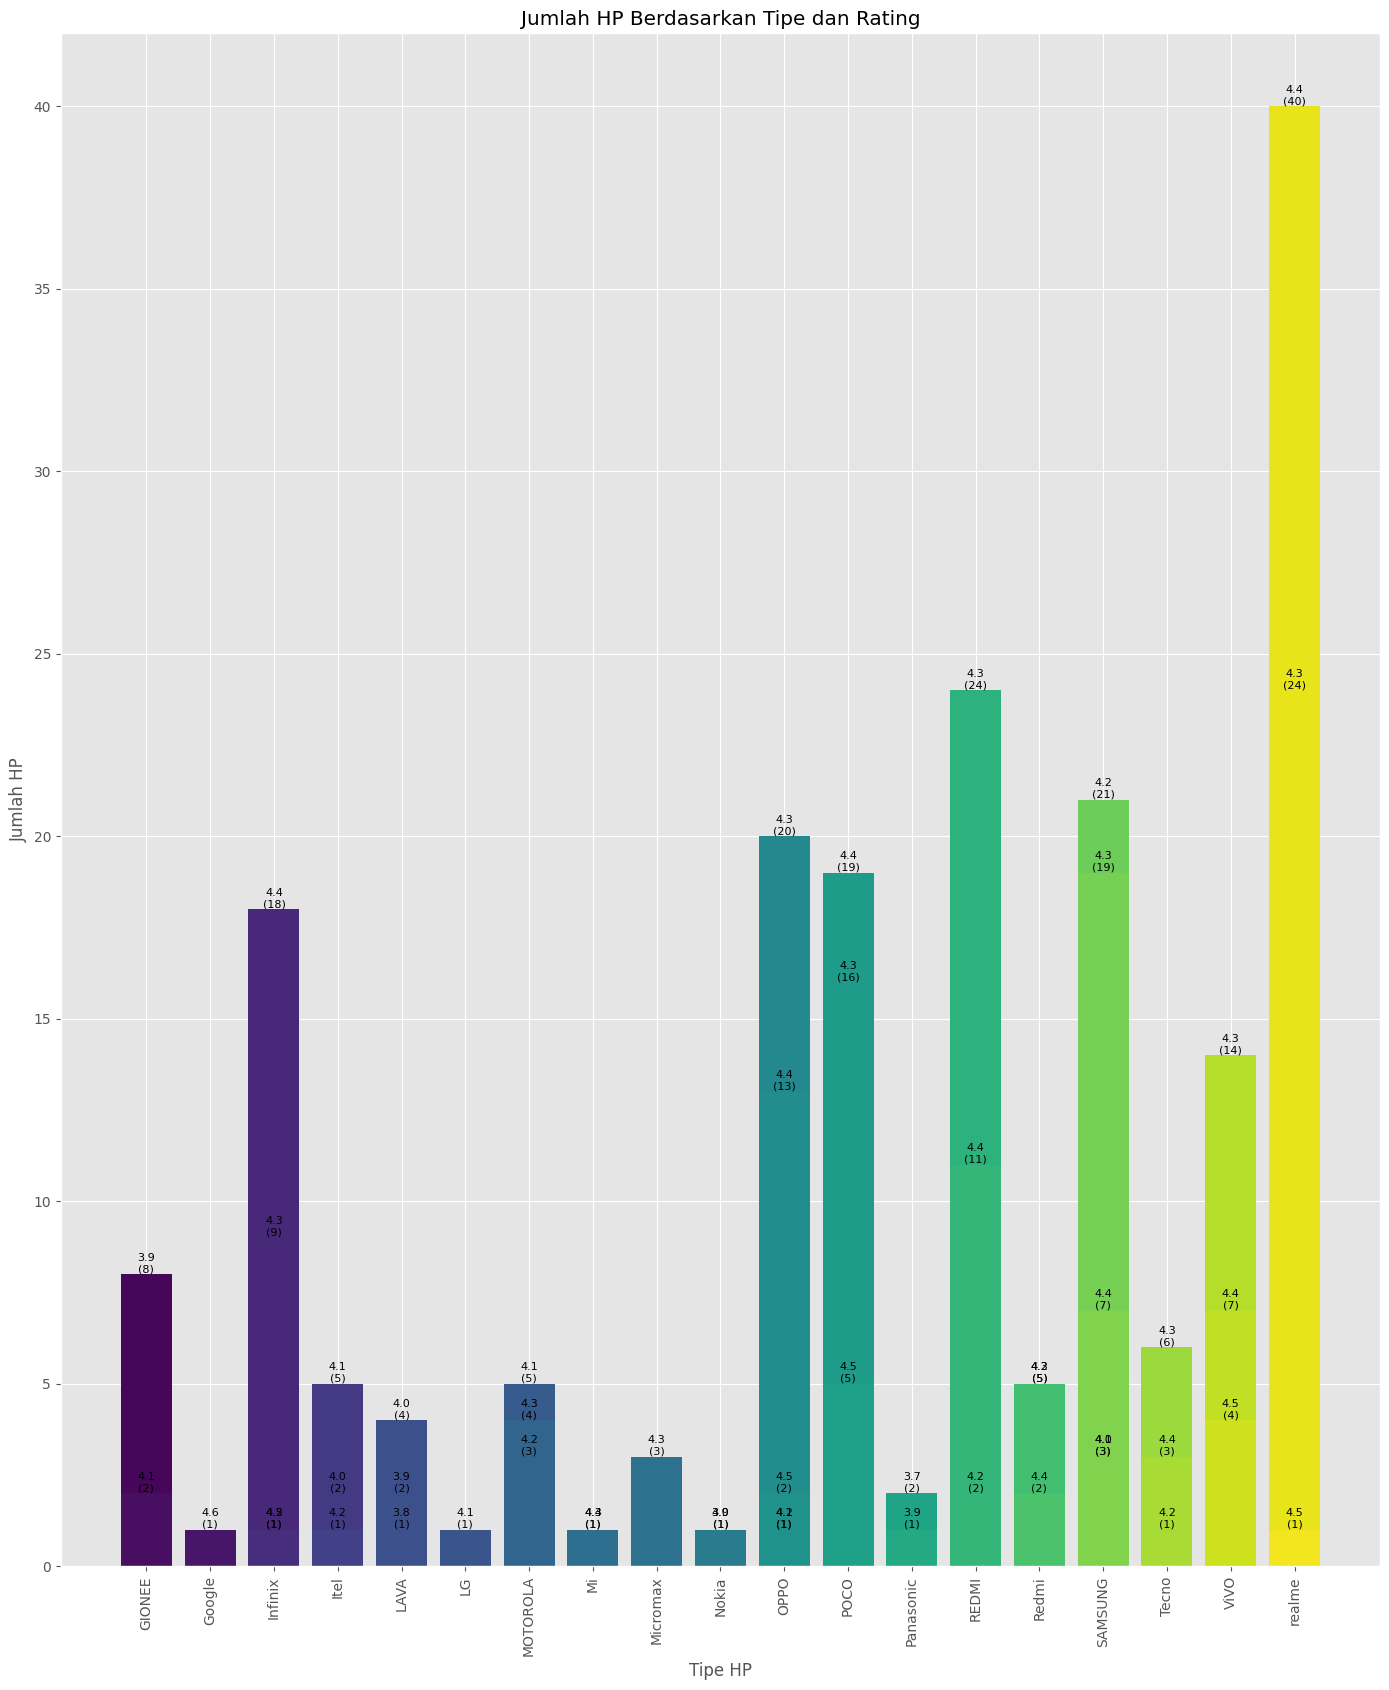

In [14]:
data['Type'] = data['Name'].str.split().str[0]

type_ratings_counts = data.groupby(['Type', 'Ratings']).size().reset_index(name='Count')

colors = sns.color_palette("viridis", len(type_ratings_counts))

plt.figure(figsize=(14, 17))
bars = plt.bar(type_ratings_counts['Type'], type_ratings_counts['Count'], color=colors)

plt.title('Jumlah HP Berdasarkan Tipe dan Rating')
plt.xlabel('Tipe HP')
plt.ylabel('Jumlah HP')
plt.xticks(rotation=90)

for bar, rating, count in zip(bars, type_ratings_counts['Ratings'], type_ratings_counts['Count']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{rating}\n({count})",
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

Insights:

• Realme memiliki jumlah HP terbanyak dengan angka mencapai 40 unit dan rating rata-rata 4.4, menunjukkan popularitas produk mereka yang konsisten dengan penilaian yang cukup baik.

• Merek seperti POCO dan OPPO mencapai rating tertinggi di angka 4.5, meskipun jumlah produknya lebih sedikit dibandingkan Realme. Ini menunjukkan kualitas produk mereka diapresiasi pengguna atau memenuhi kebutuhan pengguna.

Visualisasi 2: Boxplot HP berdasarkan harga

Untuk memvisualisasikan 10 tipe HP berdasarkan harga tertinggi.

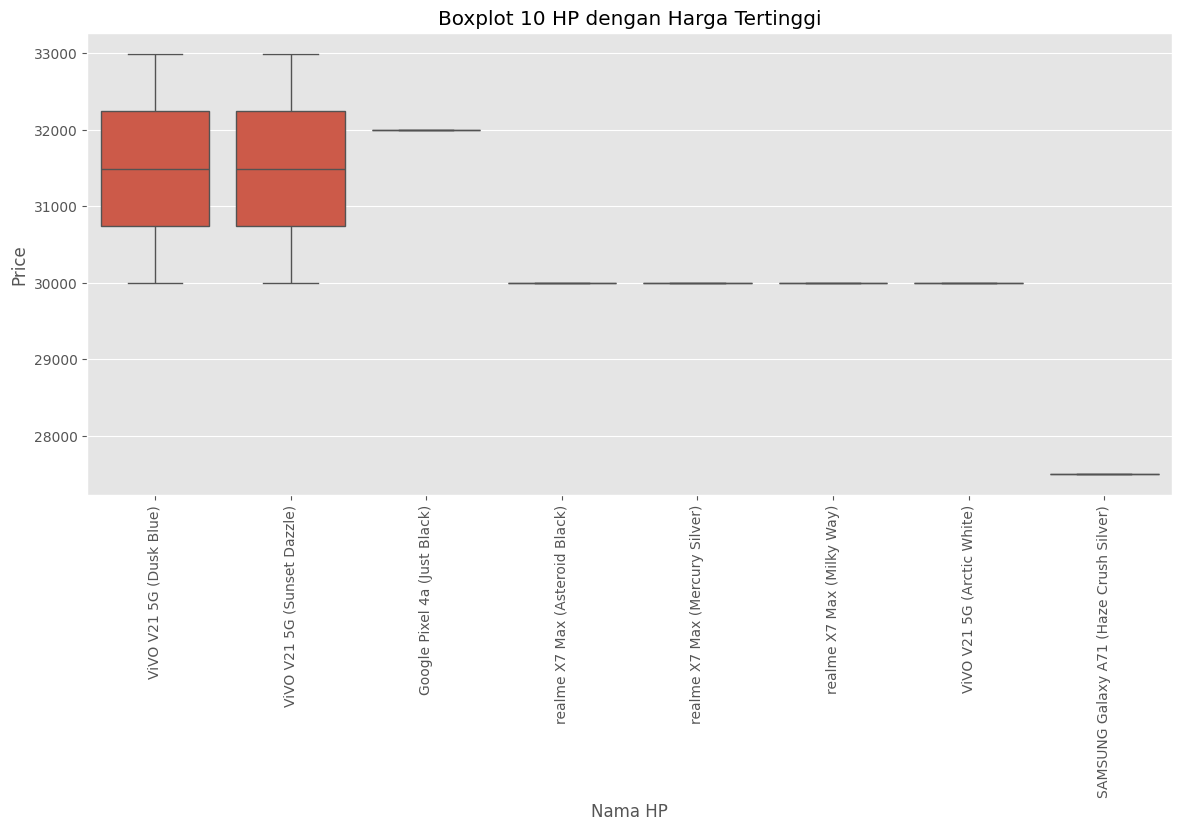

In [15]:
top_price_hp = data.nlargest(10, 'Price')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Name', y='Price', data=top_price_hp)
plt.xticks(rotation=90)
plt.title('Boxplot 10 HP dengan Harga Tertinggi')
plt.ylabel('Price')
plt.xlabel('Nama HP')
plt.show()

Insights:

• Boxplot memperlihatkan variasi yang signifikan dalam data hp dengan berbagai harga.

• Beberapa tipe menunjukkan harga yang lebih tinggi sesuai dengan spesifikasi hp.

Visualisasi 3: ROM vs Harga
Untuk melihat apakah ada hubungan antara ukuran populasi dan jumlah kasus aktif.

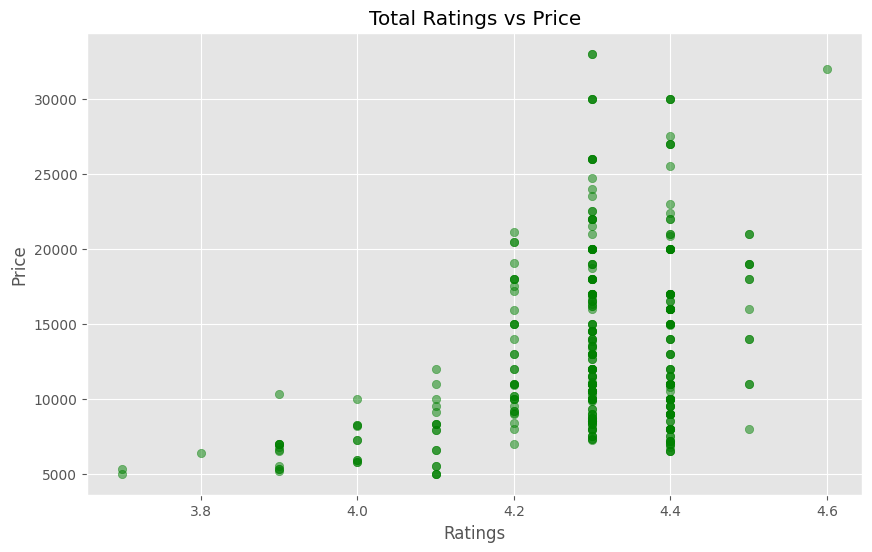

In [16]:
# Scatter plot total kasus aktif vs populasi
plt.figure(figsize=(10,6))
plt.scatter(data['Ratings'], data['Price'], alpha=0.5, color='green')
plt.title('Total Ratings vs Price')
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

Insights:

• Scatter plot tersebut menunjukkan hubungan positif antara kapasitas rating dan harga. 

• HP dengan harga tinggi tidak selalu memiliki rating tertinggi, dan begitu pula sebaliknya.

• Hal ini juga bisa disebabkan oleh faktor lain seperti spesifikasi ROM, RAM dan fitur tambahan juga bisa mempengaruhi harga.


Visualisasi 4: Heatmap Korelasi Antara Variabel

Untuk mengidentifikasi korelasi antar variabel.

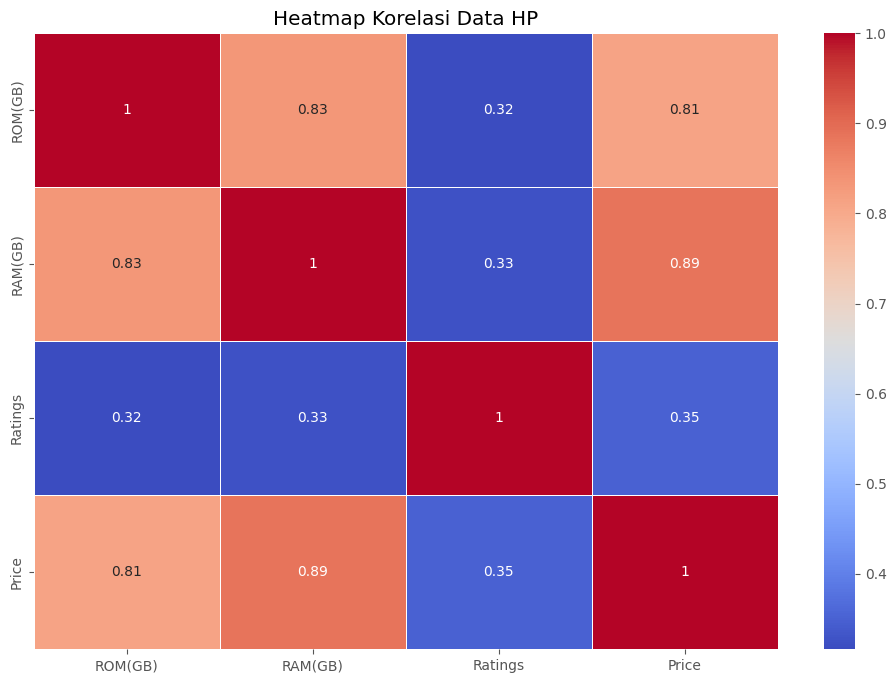

In [17]:
# Heatmap korelasi
plt.figure(figsize=(12,8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Data HP')
plt.show()

Insights:

• ROM dan RAM memiliki korelasi yang positif. Dimana, HP dengan kapasitas ROM yang besar cenderung memiliki kapasitas RAM yang besar juga.

• RAM, ROM dan harga memiliki korelasi yang sangat kuat. Semakin besar RAM, semakin mahal harga HP. 

• Terdapat korelasi positif rendah antara rating pengguna dan harga. Ini menunjukkan bahwa harga lebih tinggi tidak selalu menghasilkan ulasan pengguna yang baik, karena ulasan pengguna dapat dipengaruhi oleh faktor lain.

Visualisasi 5: Line Plot Kasus Baru dari Waktu ke Waktu

Untuk mengamati tren minat hp dari waktu ke waktu.

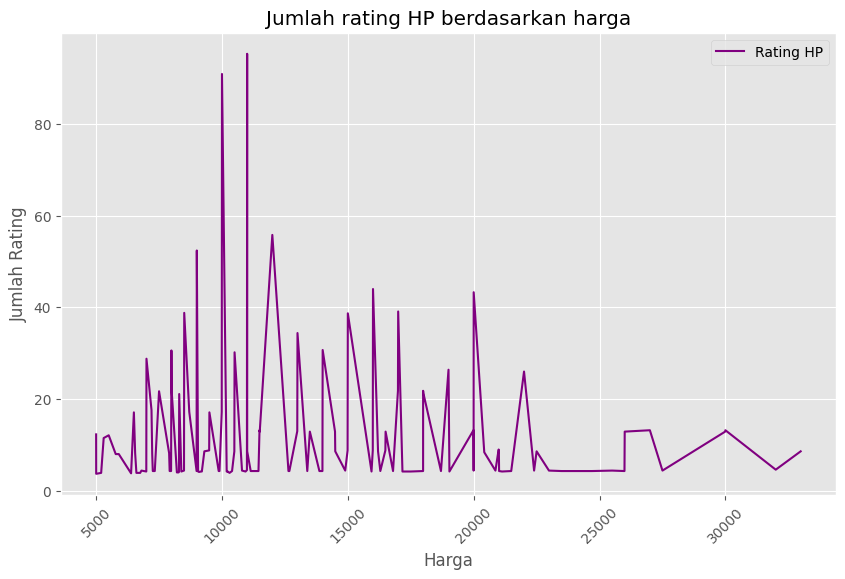

In [18]:
# Mengelompokkan data berdasarkan ROM dan RAM
data_grouped = data.groupby('Price').sum()

# Line plot kasus baru dari waktu ke waktu
plt.figure(figsize=(10,6))
plt.plot(data_grouped.index, data_grouped['Ratings'], label='Rating HP', color='purple')
plt.title('Jumlah rating HP berdasarkan harga')
plt.xlabel('Harga')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Insights:

• Plot ini menunjukkan tren fluktuasi harga hp berdasarkan rating yang diberikan konsumen.

• Wawasan yang bisa diperoleh adalah kapan puncak tertinggi pada harga sekitar 10.000. Ini menunjukkan bahwa HP dengan harga ini sangat diminati.

• Tren ini juga bisa digunakan untuk memprediksi atau mengantisipasi pola lonjakan di masa mendatang.

7. Kesimpulan

   Dari seluruh visualisasi, kita dapat memahami bahwa:

   • Data menunjukkan pola hubungan yang konsisten antara spesifikasi (RAM/ROM) dan harga, tapi hp dengan harga yang lebih tinggi tidak selalu mencerminkan kepuasan pengguna. 

   • HP dengan harga menengah lebih banyak diminati oleh konsumen.

   Data ini sangat bermanfaat untuk memahami pola kebutuhan dan preferensi konsumen untuk merancang strategi yang lebih baik dalam menyesuaikan produk.

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error

In [31]:
import tensorflow as tf
from tabulate import tabulate
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
#MODELING
# Input pengguna
input_name = input("Masukkan nama hp yang diinginkan (contoh: realme): ").lower()  # Mengubah input ke huruf kecil
input_rom = int(input("Masukkan kapasitas ROM yang diinginkan (dalam GB): "))
input_ram = int(input("Masukkan kapasitas RAM yang diinginkan (dalam GB): "))

# Content-Based Filtering
# TF-IDF Vectorization untuk nama
tfidf = TfidfVectorizer()
name_vectors = tfidf.fit_transform(data['Name'].str.lower())

# Gabungkan fitur TF-IDF dengan ROM, RAM, dan Ratings
numerical_features = data[['ROM(GB)', 'RAM(GB)', 'Ratings']].values
combined_features = pd.concat([
    pd.DataFrame(name_vectors.toarray()),
    pd.DataFrame(numerical_features)
], axis=1).values

# Query pengguna
query_vector = tfidf.transform([input_name]).toarray()
query_numerical = [[input_rom, input_ram, 0]]  # Ratings diatur ke 0 untuk pencarian
query_combined = pd.concat([
    pd.DataFrame(query_vector),
    pd.DataFrame(query_numerical)
], axis=1).values

# Hitung kesamaan menggunakan cosine similarity
similarities = cosine_similarity(query_combined, combined_features)

# Tambahkan skor kesamaan ke dataset
data['Similarity'] = similarities.flatten()

# Filter hasil berdasarkan nama, ROM, dan RAM
data_filtered = data[
    (data['Name'].str.lower().str.contains(input_name)) &  # Filter nama berbasis input
    (data['ROM(GB)'] == input_rom) &
    (data['RAM(GB)'] == input_ram)
]

# Periksa apakah ada data yang cocok
if not data_filtered.empty:
    # Urutkan hasil berdasarkan kesamaan tertinggi
    recommended = data_filtered.sort_values(by='Similarity', ascending=False)
    
    # Tampilkan hasil dalam tabel rapi menggunakan tabulate
    print("\nHasil Rekomendasi:")
    print(tabulate(recommended[['Name', 'ROM(GB)', 'RAM(GB)', 'Ratings', 'Price', 'Similarity']],
                   headers='keys', tablefmt='fancy_grid'))
else:
    print("\nTidak ada smartphone yang memenuhi kriteria pencarian Anda.")


# EVALUASI
# Ground Truth: Mark item relevan (1) jika sesuai dengan input pengguna
y_true = [
    1 if (row['Name'].lower().startswith(input_name) and 
          row['ROM(GB)'] == input_rom and 
          row['RAM(GB)'] == input_ram)
    else 0
    for _, row in data.iterrows()
]

# Prediksi: Mark item relevan (1) jika masuk dalam hasil filter
y_pred = [1 if idx in data_filtered.index else 0 for idx in data.index]

# Hitung Precision, Recall, dan F1-Score
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

# Cetak hasil evaluasi
print("\nEvaluasi Sistem Rekomendasi:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Hasil Rekomendasi:
╒═════╤════════════════════════════════════════════╤═══════════╤═══════════╤═══════════╤═════════╤══════════════╕
│     │ Name                                       │   ROM(GB) │   RAM(GB) │   Ratings │   Price │   Similarity │
╞═════╪════════════════════════════════════════════╪═══════════╪═══════════╪═══════════╪═════════╪══════════════╡
│  28 │ realme 8 5G (Supersonic Blue)              │        64 │         4 │       4.3 │   13999 │     0.997599 │
├─────┼────────────────────────────────────────────┼───────────┼───────────┼───────────┼─────────┼──────────────┤
│  69 │ realme Narzo 20 (Glory Silver)             │        64 │         4 │       4.3 │   10499 │     0.997583 │
├─────┼────────────────────────────────────────────┼───────────┼───────────┼───────────┼─────────┼──────────────┤
│ 130 │ realme C25s (Watery Blue)                  │        64 │         4 │       4.4 │    9999 │     0.997494 │
├─────┼────────────────────────────────────────────┼───────────┼────

In [28]:
# Membuat model Deep Learning sederhana
input_dim = 5

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Simpan model setelah pelatihan
model.save('model.h5')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
